In [1]:
#library for analyst csv
import pandas as pd

In [4]:
#load csv
data =  pd.read_csv("C:/Users/jchav/OneDrive/Desktop/proyectos python/resume hr/resume hr/Resume/Resume.csv")

In [5]:
#show frist 10 rows of data
data.head(10)

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR
5,11592605,HR GENERALIST Summary Dedic...,"<div class=""fontsize fontface vmargins hmargin...",HR
6,25824789,HR MANAGER Summary HUMAN RES...,"<div class=""fontsize fontface vmargins hmargin...",HR
7,15375009,HR MANAGER Professional Summa...,"<div class=""fontsize fontface vmargins hmargin...",HR
8,11847784,HR SPECIALIST Summary Posses...,"<div class=""fontsize fontface vmargins hmargin...",HR
9,32896934,HR CLERK Summary Translates ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [8]:
#information of dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null   int64 
 1   Resume_str   2484 non-null   object
 2   Resume_html  2484 non-null   object
 3   Category     2484 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.8+ KB


In [10]:
#unique values per column
data.nunique()

ID             2484
Resume_str     2482
Resume_html    2482
Category         24
dtype: int64

In [11]:
#unique category resume
data["Category"].unique()

array(['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE',
       'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE',
       'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT',
       'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION'],
      dtype=object)

In [13]:
#check null data
data.isnull().sum()

ID             0
Resume_str     0
Resume_html    0
Category       0
dtype: int64

In [14]:
#check empty data
data.eq("").sum()

ID             0
Resume_str     0
Resume_html    0
Category       0
dtype: int64

In [15]:
#funtion for resume length in words
def count_words(text):
    words = text.split()
    return len(words)

In [17]:
#resume length in words
data["Resume_words"] = data["Resume_str"].apply(count_words)

In [18]:
#describe of words in resume
data.describe()

,ID,Resume_words
count,2.484000e+03,2484.000000
mean,3.182616e+07,811.325684
std,2.145735e+07,371.006906
min,3.547447e+06,0.000000
25%,1.754430e+07,651.000000
50%,2.521031e+07,757.000000
75%,3.611444e+07,933.000000
max,9.980612e+07,5190.000000


In [19]:
#library for graphics
import matplotlib.pyplot as plt
import seaborn as sns

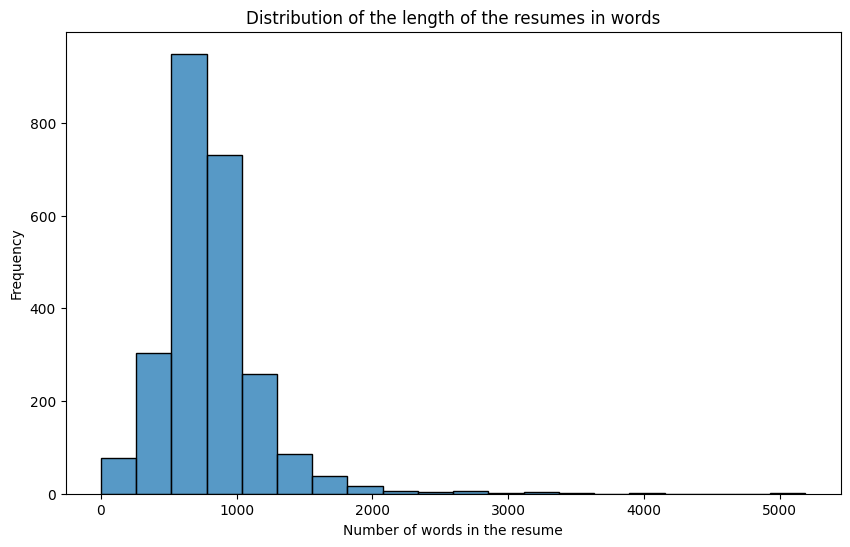

In [22]:
#graph the distrubution of words
plt.figure(figsize=(10,6))
sns.histplot(data["Resume_words"], bins=20)
plt.title("Distribution of the length of the resumes in words")
plt.xlabel("Number of words in the resume")
plt.ylabel("Frequency")
plt.show()

In [28]:
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jchav\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [29]:
#filter most commun verb in resume
def filter_verbs(text):
    words = word_tokenize(text)
    tagged_words = pos_tag(words)
    verbs = [word for word, tag in tagged_words if tag.startswith('V')]
    return verbs

In [30]:
#appli funtion to resume
verbs_by_category = data.groupby('Category')['Resume_str'].apply(lambda x: ' '.join(x)).apply(filter_verbs)


In [37]:
#dictionary with 3 verbs most common
top_verbs_by_category = {}

In [38]:
#iterate 3 verbs most common
for category, verbs in verbs_by_category.items():
    freq = nltk.FreqDist(verbs)
    top_verbs = freq.most_common(3)
    top_verbs_by_category[category] = dict(top_verbs)

In [39]:
#create dataframe with 3 verbs most common
data_plot = pd.DataFrame(top_verbs_by_category).T.fillna(0)

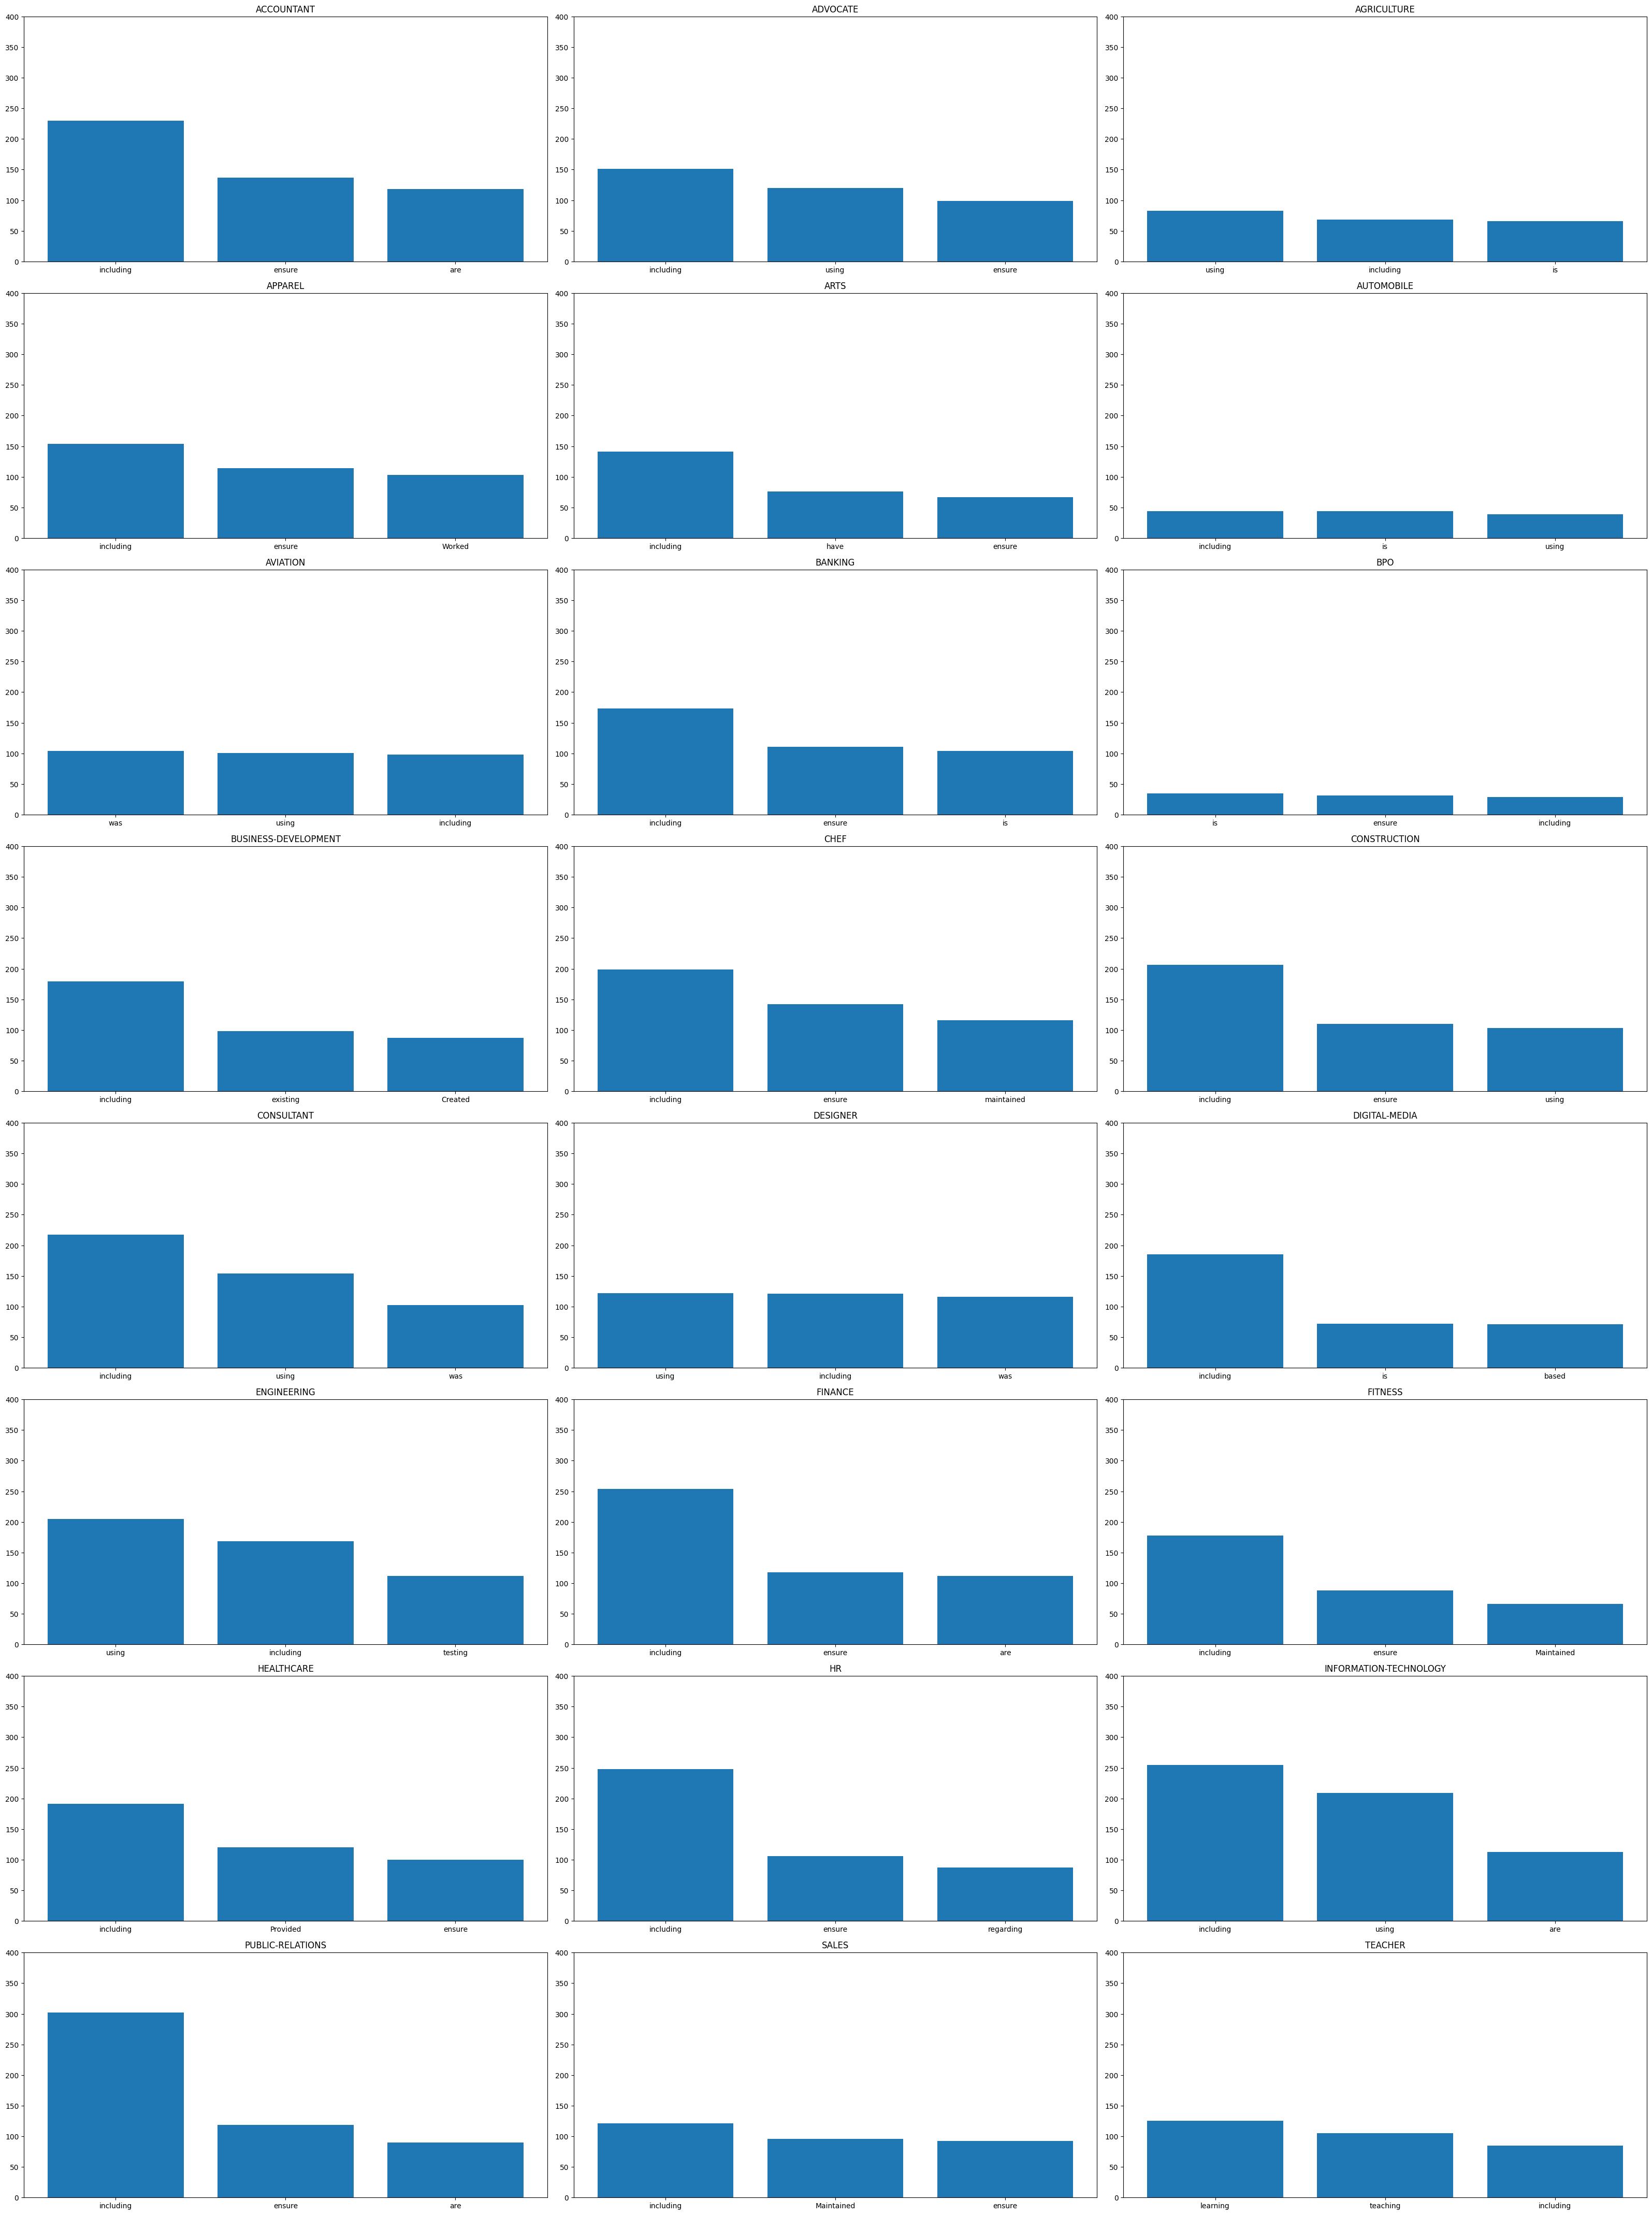

In [46]:
# Crear una figura con subgráficos para cada categoría
fig = plt.figure(figsize=(32, 64))

# Iterar sobre las categorías y graficar los 3 verbos más comunes
for i, (category, top_verbs) in enumerate(top_verbs_by_category.items()):
    ax = fig.add_subplot(12, 3, i + 1)
    ax.set_title(category)
    ax.bar(top_verbs.keys(), top_verbs.values())
    ax.set_ylim(0, 400)

plt.tight_layout()
plt.show()

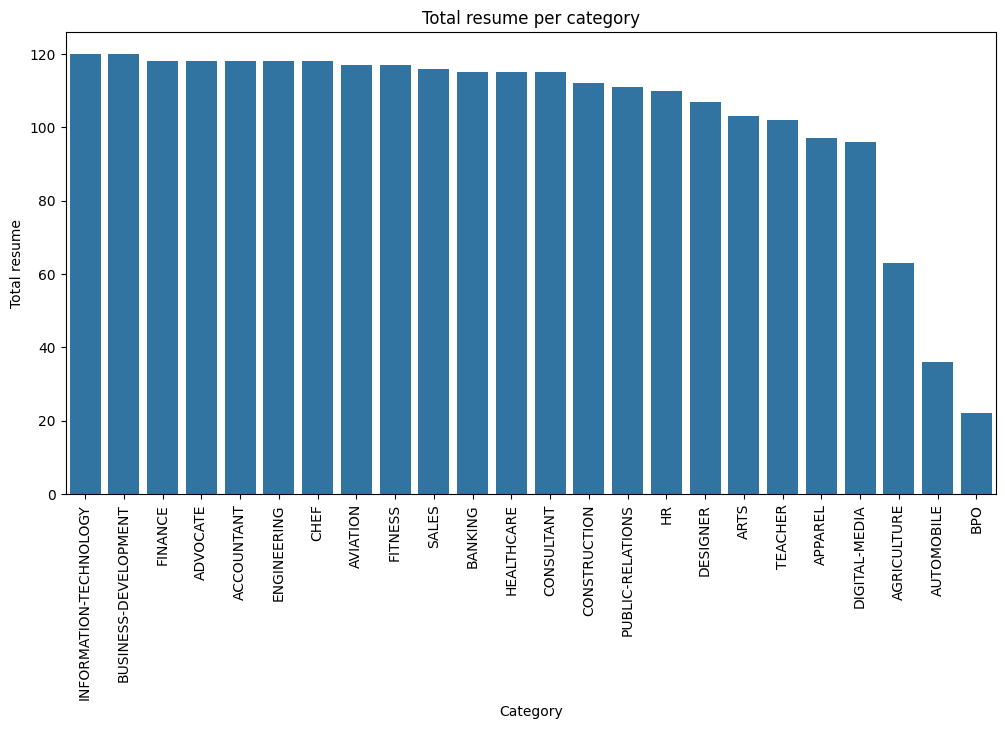

In [48]:
#count category
total_resumes_by_category = data['Category'].value_counts()

#graphic of total resume per category
plt.figure(figsize=(12, 6))
sns.barplot(x=total_resumes_by_category.index, y=total_resumes_by_category.values)
plt.xlabel('Category')
plt.ylabel('Total resume')
plt.title('Total resume per category')
plt.xticks(rotation=90)
plt.show()

In [59]:
#Model Machine Learning for classification of resume per category
#1 import library necesary
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


In [51]:
#2 div data x y
X = data['Resume_str']
y = data['Category']

In [52]:
#3 vectorize the text using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(X)

In [53]:
#4 div data train and test
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [54]:
#5 train model Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [55]:
#6 predict category in test
y_pred = nb_classifier.predict(X_test)

In [61]:
#7 evaluate model
print(classification_report(y_test, y_pred))

                        precision    recall  f1-score   support

            ACCOUNTANT       0.79      0.90      0.84        29
              ADVOCATE       0.62      0.33      0.43        30
           AGRICULTURE       0.00      0.00      0.00         8
               APPAREL       0.80      0.20      0.32        20
                  ARTS       0.00      0.00      0.00        18
            AUTOMOBILE       0.00      0.00      0.00         6
              AVIATION       0.63      0.81      0.71        21
               BANKING       0.79      0.48      0.59        23
                   BPO       0.00      0.00      0.00         2
  BUSINESS-DEVELOPMENT       0.40      0.63      0.49        27
                  CHEF       0.81      0.71      0.76        24
          CONSTRUCTION       0.95      0.56      0.70        34
            CONSULTANT       0.50      0.05      0.09        20
              DESIGNER       0.82      0.74      0.78        19
         DIGITAL-MEDIA       1.00      

c:\Users\jchav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jchav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jchav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [60]:
accuracy = accuracy_score(y_test, y_pred)
print("Porcentaje de precisión: {:.2f}%".format(accuracy * 100))

Porcentaje de precisión: 52.92%


In [174]:
#transform data for model deep learning
category_mapping = {category: idx for idx, category in enumerate(data['Category'].unique())}

In [176]:
data['category_id'] = data['Category'].map(category_mapping)

In [177]:
data.head()

,ID,Resume_str,Resume_html,Category,Resume_words,Category_encoded,category_id
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR,674,19,0
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR,708,19,0
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR,1017,19,0
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR,379,19,0
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR,1206,19,0


In [213]:
#number asignate for category
print(data["Category"].unique())
print(data["Category_encoded"].unique())

['HR' 'DESIGNER' 'INFORMATION-TECHNOLOGY' 'TEACHER' 'ADVOCATE'
 'BUSINESS-DEVELOPMENT' 'HEALTHCARE' 'FITNESS' 'AGRICULTURE' 'BPO' 'SALES'
 'CONSULTANT' 'DIGITAL-MEDIA' 'AUTOMOBILE' 'CHEF' 'FINANCE' 'APPAREL'
 'ENGINEERING' 'ACCOUNTANT' 'CONSTRUCTION' 'PUBLIC-RELATIONS' 'BANKING'
 'ARTS' 'AVIATION']
[19 13 20 23  1  9 18 17  2  8 22 12 14  5 10 16  3 15  0 11 21  7  4  6]


In [212]:
#only columns necessary
data2 = data[["Resume_str", "Category", "Category_encoded" ]]
data2.head()

,Resume_str,Category,Category_encoded
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR,19
1,"HR SPECIALIST, US HR OPERATIONS ...",HR,19
2,HR DIRECTOR Summary Over 2...,HR,19
3,HR SPECIALIST Summary Dedica...,HR,19
4,HR MANAGER Skill Highlights ...,HR,19


In [215]:
#import library for DEEP LEARNING MODEL
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [205]:
#DIV DATA X AND Y
X = data2.drop(['Resume_str', 'Category'], axis=1)
y = data2['Category_encoded']

In [206]:
#split data for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [207]:
#train data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [208]:
#create deep learning model
model = keras.Sequential([
    keras.layers.Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(len(data2['Category_encoded'].unique()), activation='softmax')
])

c:\Users\jchav\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  **kwargs,


In [209]:
#compilate model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [210]:
#fit model
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0740 - loss: 3.0903 - val_accuracy: 0.0966 - val_loss: 2.6709
Epoch 2/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1255 - loss: 2.5811 - val_accuracy: 0.1916 - val_loss: 2.3247
Epoch 3/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1579 - loss: 2.2982 - val_accuracy: 0.2738 - val_loss: 2.0061
Epoch 4/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2533 - loss: 2.0240 - val_accuracy: 0.3623 - val_loss: 1.6877
Epoch 5/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3635 - loss: 1.7443 - val_accuracy: 0.5121 - val_loss: 1.4514
Epoch 6/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3951 - loss: 1.5612 - val_accuracy: 0.6425 - val_loss: 1.2619
Epoch 7/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4586 - loss: 1.4078 - val_accuracy: 0.5942 - val_loss: 1.1502
Epoch 8/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4790 - loss: 1.2903 - val_accuracy: 0.6264 - val_loss:

In [211]:
#show accuracy and loss prediction
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}, Loss: {loss}')

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - accuracy: 0.9555 - loss: 0.2542
Accuracy: 0.9613526463508606, Loss: 0.24855287373065948


In [228]:
for i in range(10):
    X_sample = X_test[i].reshape(1, -1)  # Reshape to (1, n_features)
    y_pred_sample = model.predict(X_sample)
    predicted_class = np.argmax(y_pred_sample)
    true_class = y_test.iloc[i]
    print(f'Model prediction for the resume {i + 1}: {predicted_class}, True classification: {true_class}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Model prediction for the resume 1: 23, True classification: 23
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Model prediction for the resume 2: 14, True classification: 14
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Model prediction for the resume 3: 11, True classification: 11
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Model prediction for the resume 4: 10, True classification: 10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Model prediction for the resume 5: 7, True classification: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Model prediction for the resume 6: 9, True classification: 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Model prediction for the resume 7: 13, True classification: 13
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Model prediction for the resume 8: 9, True classification: 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Model prediction for the resume 9: 23, True classification: 23
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Model prediction for the resume 10: 13, True classification

In [232]:
#save model deep learning
model.save('model_resume_classification_HR.keras')